In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import norm
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
## Sætter grænseværdien for animationsstørrelsen op##
matplotlib.rcParams['animation.embed_limit'] = 2**128

# 2 koblede vogne

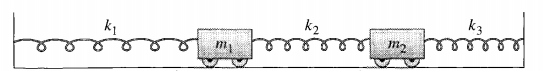

De 3 fjedre har hvilelængderne: $L_1,L_2,L_3$ og vi indfører $L=L_1+L_2+L_3$.
De to vognes positioner er fuldstændig bestemt ved $x_1,x_2$. De har hhv. følgende kintetiske og potentielle energi:
\begin{align}
U&=U_1+U_2+U_3=\frac{k_1}{2}(L_1-x_1)^2+\frac{k_2}{2}(L_2-(x_2-x_1))^2+\frac{k_3}{2}(L_3-(L-x_2))^2\\
T&=T_1+T_2=\frac{m_1}{2}\dot{x_1}^2+\frac{m_2}{2}\dot{x_2}^2\\
\end{align}
Heraf bestemmes Lagrange derfor som:
\begin{align}
\mathcal{L}(x_1,x_2,\dot{x_1},\dot{x_2})=\frac{m_1}{2}\dot{x_1}^2+\frac{m_2}{2}\dot{x_2}^2-\frac{k_1}{2}(L_1-x_1)^2-\frac{k_2}{2}(L_2-(x_2-x_1))^2-\frac{k_3}{2}(L_3-(L-x_2))^2\\
\end{align}
og vi bestemmer heraf de 2 koblede bevægelsesligninger til at være:

\begin{align}
    m_1\ddot{x_1}&=-k_2(L_2-(x_2-x_1))+k_1(L_1-x_1)\\
\ddot{x_1}&=-\frac{k_2}{m_1}(L_2-(x_2-x_1))+\frac{k_1}{m_1}(L_1-x_1)\\
\ddot{x_1}&=-\frac{(k_1+k_2)}{m_1}x_1+\frac{k_2}{m_1}x_2+\frac{k_1L_1-k_2L_2}{m_1}
\end{align}
og:
\begin{align}
m_2\ddot{x_2}&=k_2(L_2-(x_2-x_1))-k_3(L_3-(L-x_2))\\
\ddot{x_2}&=\frac{k_2}{m_2}(L_2-(x_2-x_1))-\frac{k_3}{m_2}(L_3-(L-x_2))\\
\ddot{x_2}&=-\frac{k_2+k_3}{m_2}x_2+\frac{k_2}{m_2}x_1+\frac{k_2L_2-k_3(L_3-L)}{m_2}
\end{align}

In [ ]:
## Konstanternes værdi ##
l1, l2, l3 = 1,1,1
m1, m2 = 2, 2
k1, k2, k3 = 3000, 100 , 3000

##startbetingelser
x1_0 = 2
x1_prik_0 = 0
x2_0 = 2
x2_prik_0 = 0
yinit = [x1_0,x1_prik_0,x2_0,x2_prik_0]

tinit = 0
tfinal = 10
trange = [tinit,tfinal]
ts = np.linspace(tinit, tfinal, 1000)

def dydt(t,y):
    x1 = y[0]
    x1_prik = y[1]
    x2 = y[2]
    x2_prik = y[3]
    l = l1+l2+l3
    
    d_x1_dt = x1_prik
    d_x1_prik_dt = -((k1+k2)/m1)*x1+(k2/m1)*x2+(k1*l1-k2*l2)/m1
    
    d_x2_dt = x2_prik
    d_x2_prik_dt = -(k2+k3/m2)*x2+(k2/m2)*x1+(k2*l2-k3*(l3-l))/(m2)
    
    return [d_x1_dt,d_x1_prik_dt,d_x2_dt,d_x2_prik_dt]

mysol = solve_ivp(dydt, trange, yinit, t_eval = ts,rtol=3e-14)

ts = mysol.t
x1_temp, x2_temp = mysol.y[0], mysol.y[2]
x1_prik, x2_prik = mysol.y[1], mysol.y[3]


In [ ]:
plt.rc('font', size=16)
fig,ax = plt.subplots(2,2,figsize=(20,10))
ax[1][0].plot(x1_temp,x1_prik,linestyle='--')
ax[1][1].plot(x2_temp,x2_prik,linestyle='--')

ax[0][0].plot(ts,x1_temp)
ax[0][1].plot(ts,x2_temp)

ax[1][0].grid()
ax[1][1].grid()
ax[0][0].grid()
ax[0][1].grid()

ax[1][0].set_xlabel(r'$x_1$')
ax[1][0].set_ylabel(r'$\frac{dx_1}{dt}=\dot{x_1}$')
ax[1][1].set_xlabel(r'$x_2$')
ax[1][1].set_ylabel(r'$\frac{dx_2}{dt}=\dot{x_2}$')


ax[0][0].set_xlabel('$t$')
ax[0][0].set_ylabel(r'$x_1$')
ax[0][1].set_xlabel('$t$')
ax[0][1].set_ylabel(r'$x_2$')


In [ ]:
cart_height, cart_width = 2, 3
wheel_radius = 0.5

## forskyder vognene ## 
x1, x2 = [], []
for i in range(len(x2_temp)):
    x1.append(x1_temp[i]+2*x1_0)
    x2.append(x2_temp[i]+x1[0]+cart_width+2*x2_0)



In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

### Cart 1 ###
cart1_line1, = ax.plot([],[],color='black') ## Backwall of cart
cart1_line2, = ax.plot([],[],color='black') ## Buttom of cart
cart1_line3, = ax.plot([],[],color='black') ## Frontwall of cart
cart1_line4, = ax.plot([],[],color='black') ## Roof of cart

cart1_wheel1, = ax.plot([],[],color='grey') ## Rear wheel
cart1_wheel1_center, = ax.plot([],[],'o',ms = 5, color='black')

cart1_wheel2, = ax.plot([],[],color='grey') ## Front wheel
cart1_wheel2_center, = ax.plot([],[],'o',ms = 5,color='black')

### Cart 2 ###
cart2_line1, = ax.plot([],[],color='black') ## Backwall of cart
cart2_line2, = ax.plot([],[],color='black') ## Buttom of cart
cart2_line3, = ax.plot([],[],color='black') ## Frontwall of cart
cart2_line4, = ax.plot([],[],color='black') ## Roof of cart

cart2_wheel1, = ax.plot([],[],color='grey') ## Rear wheel
cart2_wheel1_center, = ax.plot([],[],'o',ms = 5, color='black')

cart2_wheel2, = ax.plot([],[],color='grey') ## Front wheel
cart2_wheel2_center, = ax.plot([],[],'o',ms = 5,color='black')

### Springs ###
spring1, = ax.plot([],[],color='grey')     
spring2, = ax.plot([],[],color='grey') 
spring3, = ax.plot([],[],color='grey') 

def draw_wheel(wheel_center, radius):
    R, y0, x0 = radius, radius, wheel_center
    xs = np.linspace(wheel_center-radius,wheel_center+radius,1000)
    ys = y0-np.sqrt(abs(R**2-(xs-x0)**2))
    return xs, ys

def draw_spring(anchor_x0,anchor_y0,box_x0,box_y0,nr_turns,spring_width,buffer_length):
    D, R, N = buffer_length, spring_width, nr_turns
    x1, y1, x2, y2 = anchor_x0, anchor_y0, box_x0, box_y0
    spring_length = abs(x2-x1)-2*D

    xs = [x1,x1+D]
    ys = [y1,y1]
    
    k = 1
    for i in range(N-2):
        k*=-1
        if k<0:
            ys.append(y1+R)
        if k>0:
            ys.append(y1-R)
            
        x_temp = xs[i+1]+spring_length/N
        xs.append(x_temp)
        
    for j in range(2):
        xs.append(x1+spring_length+D*(j+1))
        ys.append(y1)
        
    return xs, ys

def update(i):
    
############# Cart 1 ################

    ## Plotting cart ##
    cart1_line1.set_data(x1[i],[wheel_radius,cart_height])
    cart1_line2.set_data([x1[i],x1[i]+cart_width],[wheel_radius,wheel_radius])
    cart1_line3.set_data(x1[i]+cart_width,[wheel_radius,cart_height])
    cart1_line4.set_data([x1[i],x1[i]+cart_width],[cart_height,cart_height])
    
    ## Plotting wheels ##
    wheel1_x1, wheel1_y1 = draw_wheel(x1[i]+cart_width/8+wheel_radius,wheel_radius)
    wheel1_x2, wheel1_y2 = draw_wheel(x1[i]+cart_width-cart_width/8-wheel_radius,wheel_radius)
    
    cart1_wheel1.set_data([wheel1_x1],[wheel1_y1])
    cart1_wheel2.set_data([wheel1_x2],[wheel1_y2])
    
    cart1_wheel1_center.set_data([x1[i]+cart_width/8+wheel_radius],[wheel_radius])
    cart1_wheel2_center.set_data([x1[i]+cart_width-cart_width/8-wheel_radius],[wheel_radius])

############# Cart 2 ################

        ## Plotting cart ##
    cart2_line1.set_data(x2[i],[wheel_radius,cart_height])
    cart2_line2.set_data([x2[i],x2[i]+cart_width],[wheel_radius,wheel_radius])
    cart2_line3.set_data(x2[i]+cart_width,[wheel_radius,cart_height])
    cart2_line4.set_data([x2[i],x2[i]+cart_width],[cart_height,cart_height])
    
    ## Plotting wheels ##
    wheel2_x1, wheel2_y1 = draw_wheel(x2[i]+cart_width/8+wheel_radius,wheel_radius)
    wheel2_x2, wheel2_y2 = draw_wheel(x2[i]+cart_width-cart_width/8-wheel_radius,wheel_radius)
    
    cart2_wheel1.set_data([wheel2_x1],[wheel2_y1])
    cart2_wheel2.set_data([wheel2_x2],[wheel2_y2])
    
    cart2_wheel1_center.set_data([x2[i]+cart_width/8+wheel_radius],[wheel_radius])
    cart2_wheel2_center.set_data([x2[i]+cart_width-cart_width/8-wheel_radius],[wheel_radius])
    
########### Plotting springs ###############

    spring1_x, spring1_y = draw_spring(0,(cart_height+wheel_radius)/2,x1[i],(cart_height+wheel_radius)/2,24,0.25,1)
    spring1.set_data([spring1_x],[spring1_y])
    
    spring2_x, spring2_y = draw_spring(x1[i]+cart_width,(cart_height+wheel_radius)/2,x2[i],(cart_height+wheel_radius)/2,24,0.25,1)
    spring2.set_data([spring2_x],[spring2_y])
    
    spring3_x, spring3_y = draw_spring(x2[i]+cart_width,(cart_height+wheel_radius)/2,x2[0]+2*cart_width+l3,(cart_height+wheel_radius)/2,24,0.25,1)
    spring3.set_data([spring3_x],[spring3_y])
    
    returns = [cart1_line1, cart1_line2, cart1_line3, cart1_line4, cart1_wheel1, cart1_wheel2, 
               cart1_wheel1_center, cart1_wheel2_center, cart2_line1, cart2_line2, cart2_line3, 
               cart2_line4, cart2_wheel1, cart2_wheel2, cart2_wheel1_center, cart2_wheel2_center,
               spring1, spring2, spring3]
    
    return returns

## plotting ramp ##
ax.plot([0,x2[0]+2*cart_width+l3],[0,0], linewidth = 4, color = 'grey') ## ground
ax.plot([0,0],[0,3], linewidth = 4, color = 'grey') ## back
ax.plot([x2[0]+2*cart_width+l3,x2[0]+2*cart_width+l3],[0,3], linewidth = 4, color = 'grey') ## front

## setting axes ## 
ax.set_xlim(-1,x2[0]+2*cart_width+l3+1)
ax.set_ylim(-1,5)
ax.set_aspect("equal")

## animating ## 
anim = animation.FuncAnimation(fig,
                               update,
                               frames=len(ts),
                               interval=10,
                               blit=True,
                               repeat_delay=0)
anim